*Evoked data are obtained by averaging epochs. Typically, an evoked object is constructed for each subject and each condition, but it can also be obtained by averaging a list of evoked objects over different subjects.*

In [1]:
import mne

In [2]:
root = mne.datasets.sample.data_path() / 'MEG' / 'sample'
raw_file = root / 'sample_audvis_raw.fif'
raw = mne.io.read_raw_fif(raw_file, verbose=False)

events = mne.find_events(raw, stim_channel='STI 014')
# we'll skip the "face" and "buttonpress" conditions to save memory
event_dict = {'auditory/left': 1, 'auditory/right': 2, 'visual/left': 3,
              'visual/right': 4}
epochs = mne.Epochs(raw, events, tmin=-0.3, tmax=0.7, event_id=event_dict,
                    preload=True)
evoked = epochs['auditory/left'].average()

del raw  # reduce memory usage

320 events found
Event IDs: [ 1  2  3  4  5 32]
Not setting metadata
289 matching events found
Setting baseline interval to [-0.2996928197375818, 0.0] sec
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 3)
3 projection items activated
Loading data for 289 events and 601 original time points ...
0 bad epochs dropped


In [3]:
print(f'Epochs baseline: {epochs.baseline}')
print(f'Evoked baseline: {evoked.baseline}')

Epochs baseline: (-0.2996928197375818, 0.0)
Evoked baseline: (-0.2996928197375818, 0.0)


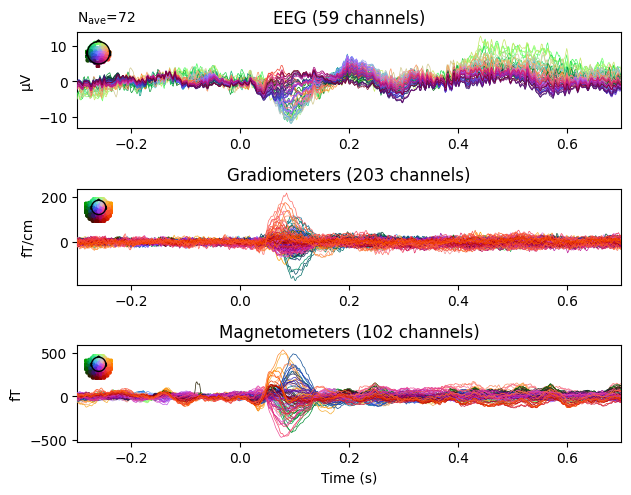

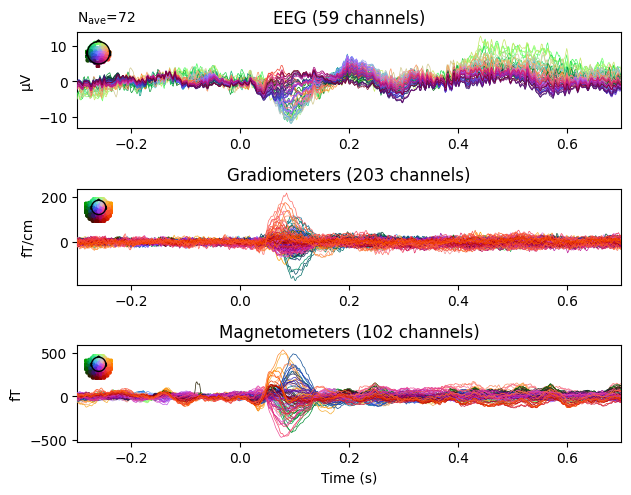

In [6]:
evoked.plot()

In [8]:
print(evoked.data[:2, :3])  # first 2 channels, first 3 timepoints

[[ 5.72160572e-13  3.57859354e-13  3.98040833e-13]
 [-2.75128428e-13 -3.15309907e-13 -5.83186429e-13]]


In [11]:
import numpy as np

import mne

In [12]:
root = mne.datasets.sample.data_path() / 'MEG' / 'sample'
evk_file = root / 'sample_audvis-ave.fif'
evokeds_list = mne.read_evokeds(evk_file, baseline=(None, 0), proj=True,
                                verbose=False)

# Show condition names and baseline intervals
for e in evokeds_list:
    print(f'Condition: {e.comment}, baseline: {e.baseline}')

Condition: Left Auditory, baseline: (-0.19979521315838786, 0.0)
Condition: Right Auditory, baseline: (-0.19979521315838786, 0.0)
Condition: Left visual, baseline: (-0.19979521315838786, 0.0)
Condition: Right visual, baseline: (-0.19979521315838786, 0.0)


#### **Visualizing Evoked data**

In [13]:
root = mne.datasets.sample.data_path() / 'MEG' / 'sample'
evk_file = root / 'sample_audvis-ave.fif'
evokeds_list = mne.read_evokeds(evk_file, baseline=(None, 0), proj=True,
                                verbose=False)

# Show condition names and baseline intervals
for e in evokeds_list:
    print(f'Condition: {e.comment}, baseline: {e.baseline}')

Condition: Left Auditory, baseline: (-0.19979521315838786, 0.0)
Condition: Right Auditory, baseline: (-0.19979521315838786, 0.0)
Condition: Left visual, baseline: (-0.19979521315838786, 0.0)
Condition: Right visual, baseline: (-0.19979521315838786, 0.0)


In [15]:
conds = ('aud/left', 'aud/right', 'vis/left', 'vis/right')
evks = dict(zip(conds, evokeds_list))
#      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^ this is equivalent to:
# {'aud/left': evokeds_list[0], 'aud/right': evokeds_list[1],
#  'vis/left': evokeds_list[2], 'vis/right': evokeds_list[3]}

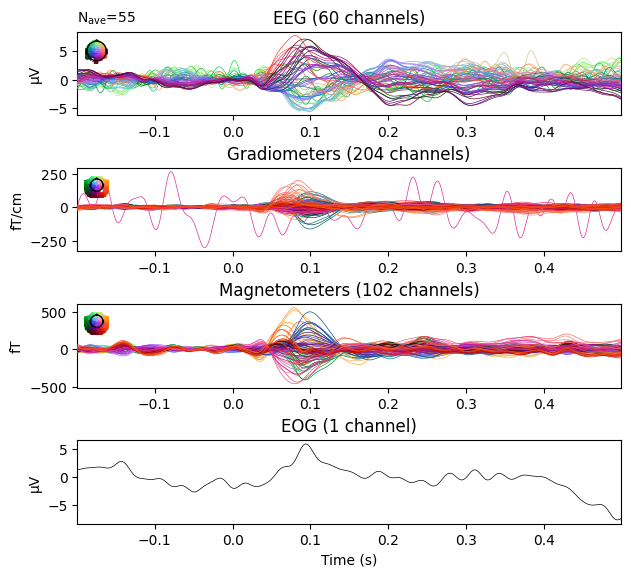

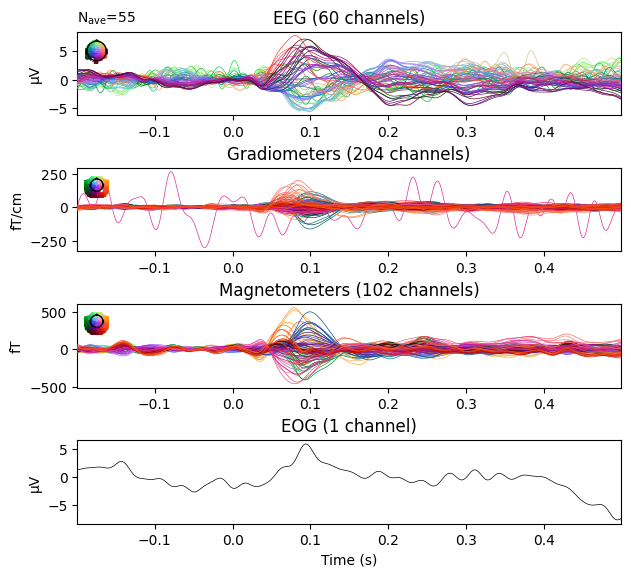

In [17]:
evks['aud/left'].plot(exclude=[])

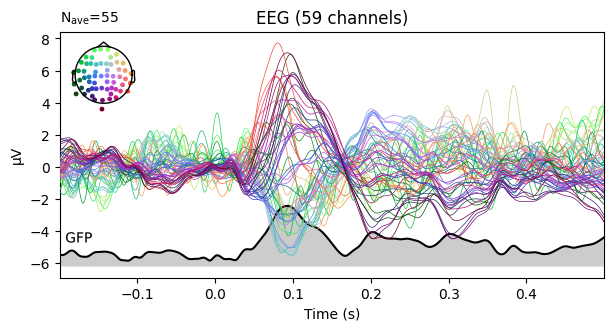

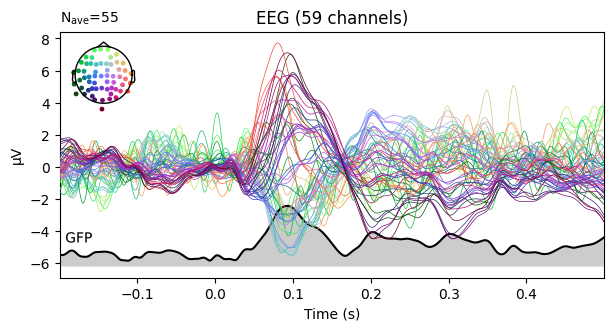

In [18]:
evks['aud/left'].plot(picks='eeg', spatial_colors=True, gfp=True)

time periods can be highlighted via the highlight parameter.

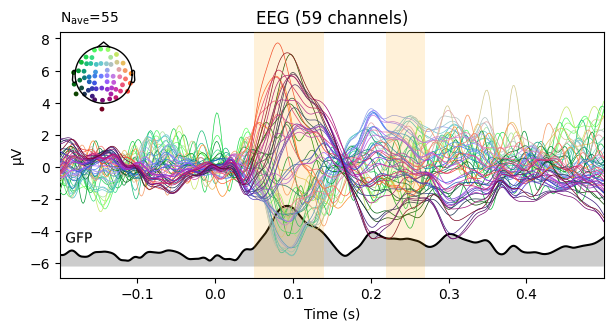

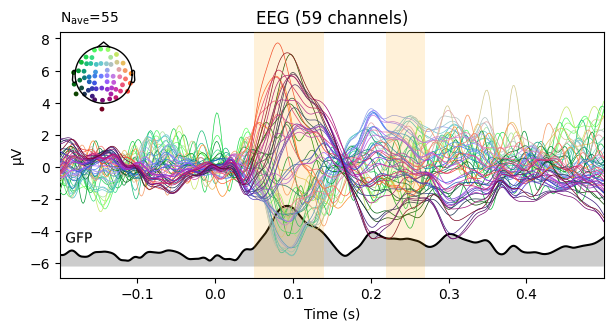

In [27]:
time_ranges_of_interest = [
    (0.05, 0.14),
    (0.22, 0.27)
]
evks['aud/left'].plot(
    picks='eeg', spatial_colors=True, gfp=True,
    highlight=time_ranges_of_interest
)